In [369]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]


In [370]:
def getDamage(attack: float, defense: float):
    if(defense > 8*attack): 
        return 0.1*attack
    if(defense > attack): 
        return (19.2/49*(attack/defense - 0.125)**2 + 0.1) * attack
    if(defense > 0.4*attack): 
        return (-0.4/3 * (attack/defense - 2.5)**2 + 0.7) * attack
    if(defense > 0.125*attack):
        return (-0.8/121 * (attack/defense - 8)**2 + 0.9) * attack
    if(defense <= 0.125*attack):
        return 0.9 * attack

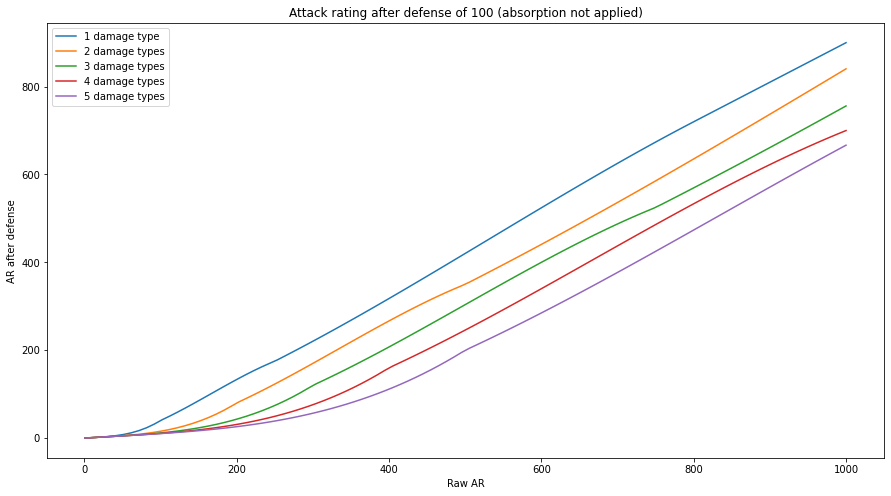

In [415]:
xs = np.linspace(1,1000,100)
defense = 100
A = np.zeros((5,100))
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        A[i,j] = (i + 1) * getDamage(xs[j]/(i+1), defense)

figure, ax = plt.subplots()
ax.set_xlabel('Raw AR')
ax.set_ylabel('AR after defense')
ax.set_title(f'Attack rating after defense of {defense} (absorption not applied)')
ax.plot(xs,A[0,:], label='1 damage type')
ax.plot(xs,A[1,:], label='2 damage types')
ax.plot(xs,A[2,:], label='3 damage types')
ax.plot(xs,A[3,:], label='4 damage types')
ax.plot(xs,A[4,:], label='5 damage types')
ax.legend()

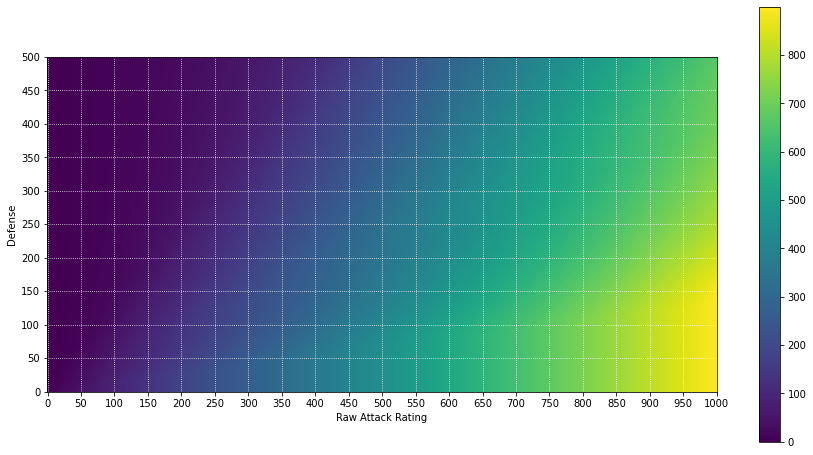

In [413]:
A = np.zeros((1000,500))
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        A[i,j] = getDamage(i,j)

figure, ax = plt.subplots()
im = ax.matshow(A.T)
cbar = plt.colorbar(im)
plt.gca().invert_yaxis()
ax.xaxis.tick_bottom()
ax.set_xlabel('Raw Attack Rating')
ax.set_ylabel('Defense')
ax.set_xticks(range(0,1001, 50))
ax.set_yticks(range(0,501,50))
ax.grid(c='white', ls=':', lw='0.8')

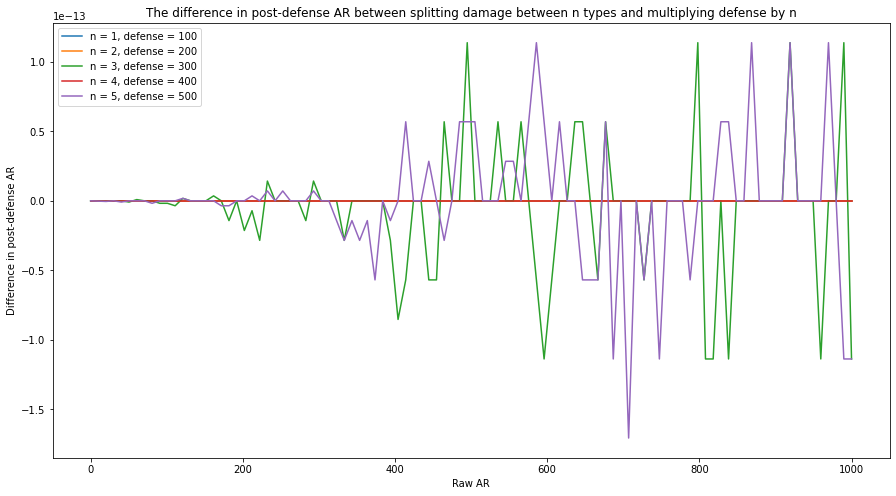

In [416]:
xs = np.linspace(0,1000,100)
defense = 100
A = np.zeros((5,100))
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        A[i,j] = (i + 1) * getDamage(xs[j]/(i+1), defense)

B = np.zeros((5,100))
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        B[i,j] = getDamage(xs[j], defense * (i+1))

A - B

figure, ax = plt.subplots()
ax.set_xlabel('Raw AR')
ax.set_ylabel('Difference in post-defense AR')
ax.set_title(f'The difference in post-defense AR between splitting damage between n types and multiplying defense by n')

ax.plot(xs,(A - B)[0,:], label=f'n = 1, defense = {defense}')
ax.plot(xs,(A - B)[1,:], label=f'n = 2, defense = {defense * 2}')
ax.plot(xs,(A - B)[2,:], label=f'n = 3, defense = {defense * 3}')
ax.plot(xs,(A - B)[3,:], label=f'n = 4, defense = {defense * 4}')
ax.plot(xs,(A - B)[4,:], label=f'n = 5, defense = {defense * 5}')
ax.legend()